#  <font color='red'> 2D Bayesian Classification </font> 

We obtain the probability distribution of the line parameters rather than scalar estimates of slope and y intercept.
 

In [33]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


import numpy as np
import scipy as sc
import pandas as pd

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]


## Reading the data

In [34]:
fname = 'fishes-1.csv'
data = pd.read_csv(fname)
data.head(10)

,Fishtype,lightness,length
0,1.0,2.220252,-1.603168
1,1.0,3.771725,-3.621082
2,1.0,2.898739,-3.625635
3,1.0,4.484533,-1.227532
4,1.0,1.005928,-3.027846
5,0.0,-0.611962,0.252595
6,0.0,-1.617321,-0.085127
7,0.0,-1.086477,0.932646
8,1.0,2.255999,-2.207233
9,1.0,4.633921,-3.386524


## Extracting the different features

In [35]:
# Exctracting the fields with Fishtype=1 (bass)
bass = data[data["Fishtype"] == 1]
basscount = bass['lightness'].count()
bassfeatures = bass.drop(columns='Fishtype')
bassfeatures = bassfeatures.to_numpy()


# Exctracting the fields with Fishtype=0 (salmon)
salmon = data[data["Fishtype"] == 0]
salmoncount = salmon['lightness'].count()
salmonfeatures = salmon.drop(columns='Fishtype')
salmonfeatures = salmonfeatures.to_numpy()

print(basscount)
print(salmoncount)

32304
18203


## Plotting the histogram

Text(0, 0.5, 'height')

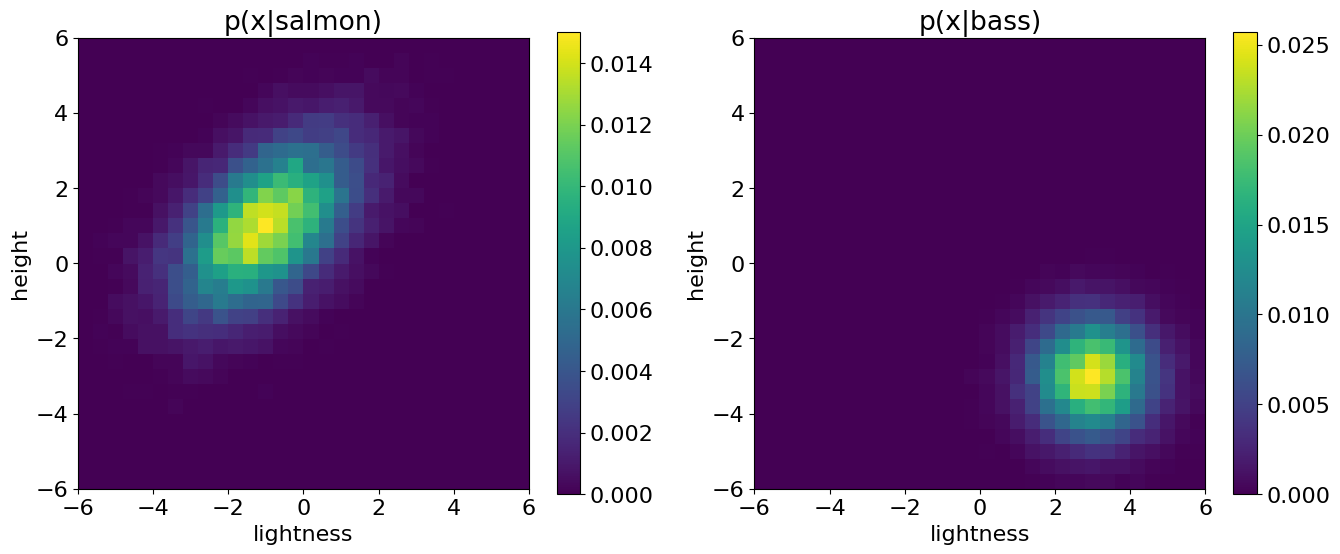

In [36]:
Nbins = 30
lbins = np.linspace(-6,6,Nbins+1)
hbins = np.linspace(-6,6,Nbins+1)

p_x_given_salmon, lbins, hbins = np.histogram2d(salmonfeatures[:,0],salmonfeatures[:,1], bins=(lbins, hbins))
p_x_given_salmon = p_x_given_salmon.T
p_x_given_salmon = p_x_given_salmon/salmoncount

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, title='p(x|salmon)')
s=plt.imshow(p_x_given_salmon, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')

p_x_given_bass, lbins, hbins = np.histogram2d(bassfeatures[:,0],bassfeatures[:,1], bins=(lbins, hbins))
p_x_given_bass = p_x_given_bass.T
p_x_given_bass = p_x_given_bass/basscount




ax = fig.add_subplot(122, title='p(x|bass)')
s=plt.imshow(p_x_given_bass, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')



## Estimation of the probability densities

We will rely on histograms to estimate the conditional probability densities $p({\rm lightness}|{\rm bass})$, $p({\rm lightness}|{\rm salmon})$

The prior probabilities $p({\rm salmon})$ from the training data as 

$$p({\rm salmon}) = \frac{N_{\rm salmon}}{N_{\rm bass} + N_{\rm salmon}}$$

and similarly 

$$p({\rm bass}) = \frac{N_{\rm bass}}{N_{\rm bass} + N_{\rm salmon}}$$

The joint probabilities can be evaluated as 

$$p({\rm salmon,lightness}) = p({\rm lightness|salmon})p({\rm salmon})$$

and 

$$p({\rm bass,lightness}) = p({\rm lightness|bass})p({\rm bass})$$

The marginal $p({\rm lightness})$ can be obtained using the sum rule as 

$$p({\rm lightness}) = p({\rm bass,lightness})+p({\rm salmon,lightness})$$

# Question 2 - A (Solution Implemented)
## Posterior probabilities P(Salmon|x) and P(Bass|x) calculated and plotted.

C:\Users\JORDY\AppData\Local\Temp\ipykernel_24100\168456992.py:38: RuntimeWarning: invalid value encountered in divide
  p_salmon_given_x = p_x_given_salmon / (p_x_given_salmon + p_x_given_bass)
C:\Users\JORDY\AppData\Local\Temp\ipykernel_24100\168456992.py:39: RuntimeWarning: invalid value encountered in divide
  p_bass_given_x = p_x_given_bass / (p_x_given_salmon + p_x_given_bass)
C:\Users\JORDY\AppData\Local\Temp\ipykernel_24100\168456992.py:42: RuntimeWarning: invalid value encountered in divide
  p_salmon_given_bass = (p_x_given_salmon * psalmon) / ((p_x_given_salmon * psalmon) + (p_x_given_bass * pbass))
C:\Users\JORDY\AppData\Local\Temp\ipykernel_24100\168456992.py:43: RuntimeWarning: invalid value encountered in divide
  p_bass_given_salmon = (p_x_given_bass * pbass) / ((p_x_given_salmon * psalmon) + (p_x_given_bass * pbass))


Text(0, 0.5, 'height')

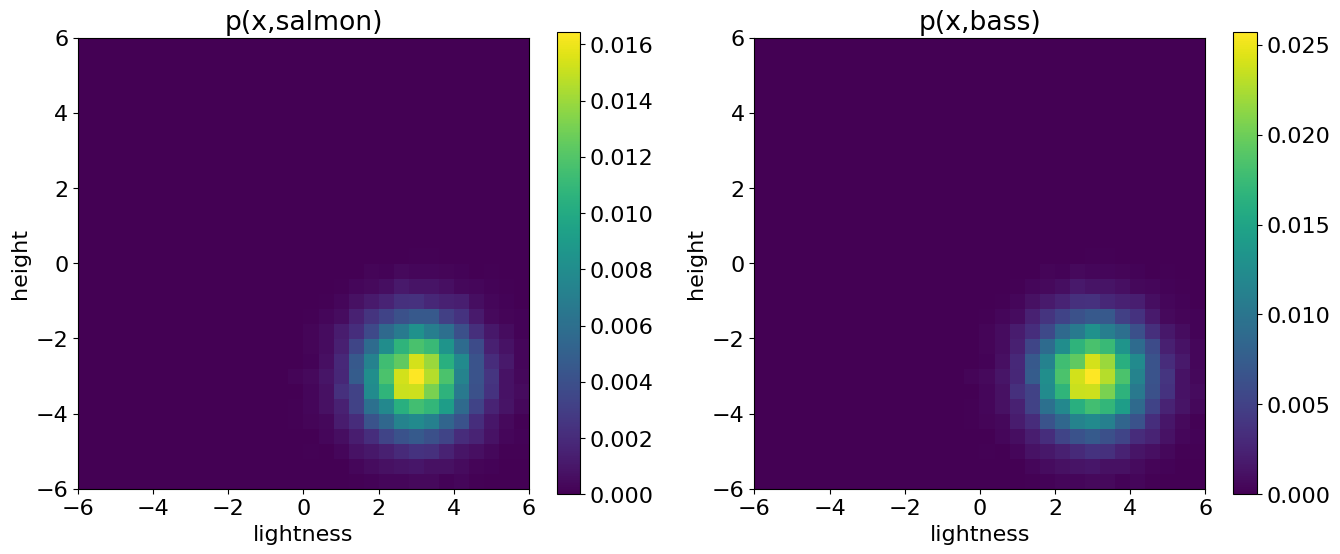

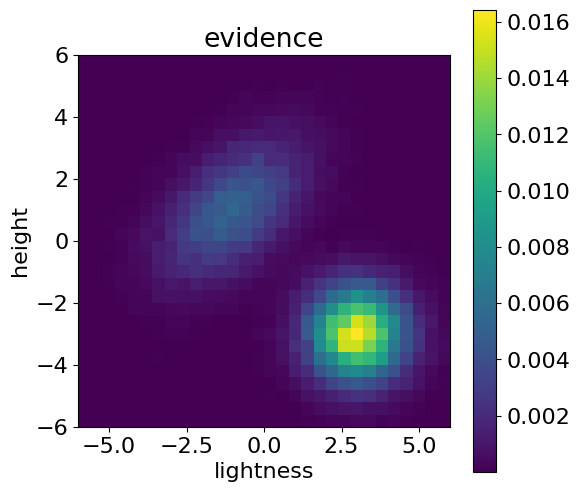

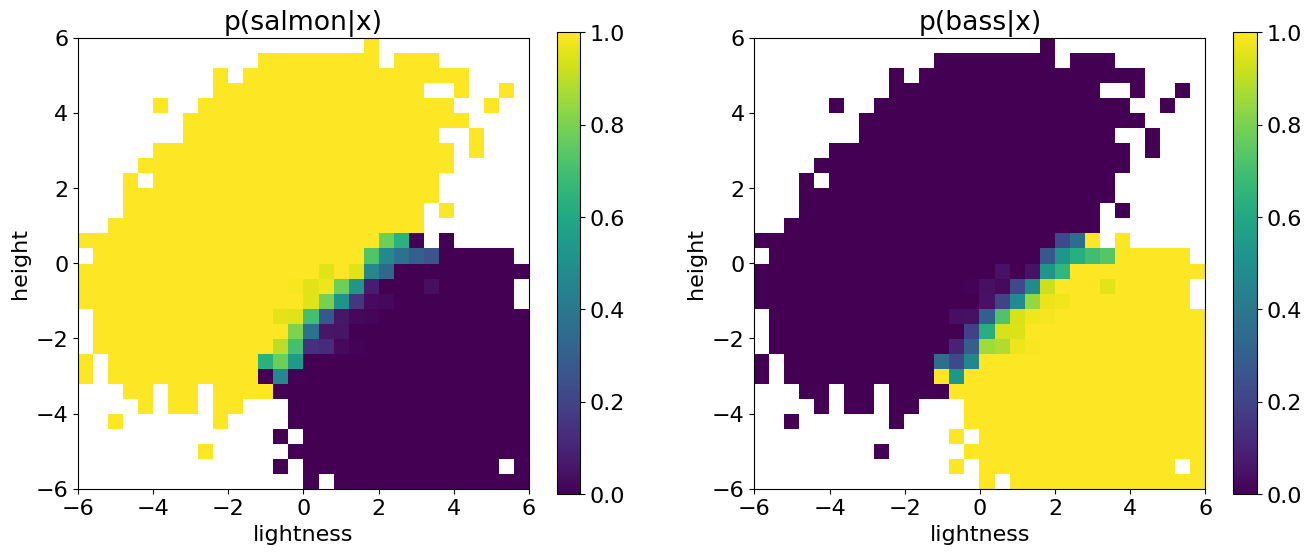

In [37]:
# Priors
pbass = basscount/(basscount+salmoncount)
psalmon = salmoncount/(basscount+salmoncount)

# Joint probabilities
p_x_and_bass = p_x_given_salmon * psalmon
p_x_and_salmon = p_x_given_bass * pbass

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, title='p(x,salmon)')
s=plt.imshow(p_x_and_salmon, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar(ax=ax)
plt.xlabel('lightness')
plt.ylabel('height')

ax = fig.add_subplot(122, title='p(x,bass)')
s=plt.imshow(p_x_given_bass, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar(ax=ax)
plt.xlabel('lightness')
plt.ylabel('height')

# Evidence
p_x = p_x_and_salmon + p_x_and_bass

p_x = p_x + 1e-6*(p_x<1e-6)
fig = plt.figure(figsize=(6, 6))
s=plt.imshow(p_x, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
s=plt.xlabel('lightness')
s=plt.ylabel('height')
s= plt.title('evidence')


# posterior probabilities
p_salmon_given_x = p_x_given_salmon / (p_x_given_salmon + p_x_given_bass)
p_bass_given_x = p_x_given_bass / (p_x_given_salmon + p_x_given_bass)

# Conditional probabilities
p_salmon_given_bass = (p_x_given_salmon * psalmon) / ((p_x_given_salmon * psalmon) + (p_x_given_bass * pbass))
p_bass_given_salmon = (p_x_given_bass * pbass) / ((p_x_given_salmon * psalmon) + (p_x_given_bass * pbass))


fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, title='p(salmon|x)')
s=plt.imshow(p_salmon_given_x, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar(ax=ax)
plt.xlabel('lightness')
plt.ylabel('height')

ax = fig.add_subplot(122, title='p(bass|x)')
s=plt.imshow(p_bass_given_x, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar(ax=ax)
plt.xlabel('lightness')
plt.ylabel('height')



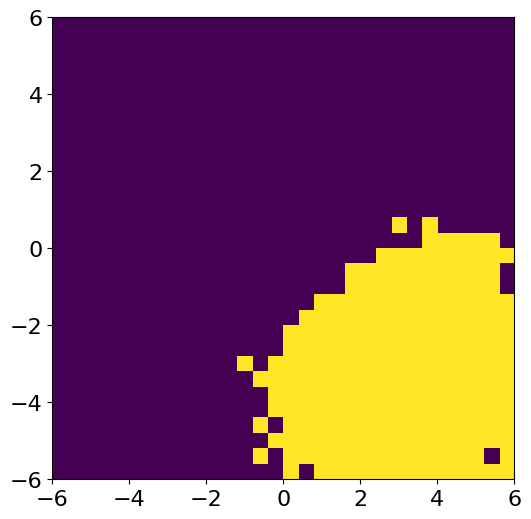

In [38]:
bass_region = p_bass_given_x > 0.85

s=plt.imshow(bass_region, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])

C:\Users\JORDY\AppData\Local\Temp\ipykernel_24100\758204318.py:1: RuntimeWarning: invalid value encountered in divide
  p_salmon_given_x = p_x_given_salmon / (p_x_given_salmon + p_x_given_bass)
C:\Users\JORDY\AppData\Local\Temp\ipykernel_24100\758204318.py:2: RuntimeWarning: invalid value encountered in divide
  p_bass_given_x = p_x_given_bass / (p_x_given_salmon + p_x_given_bass)


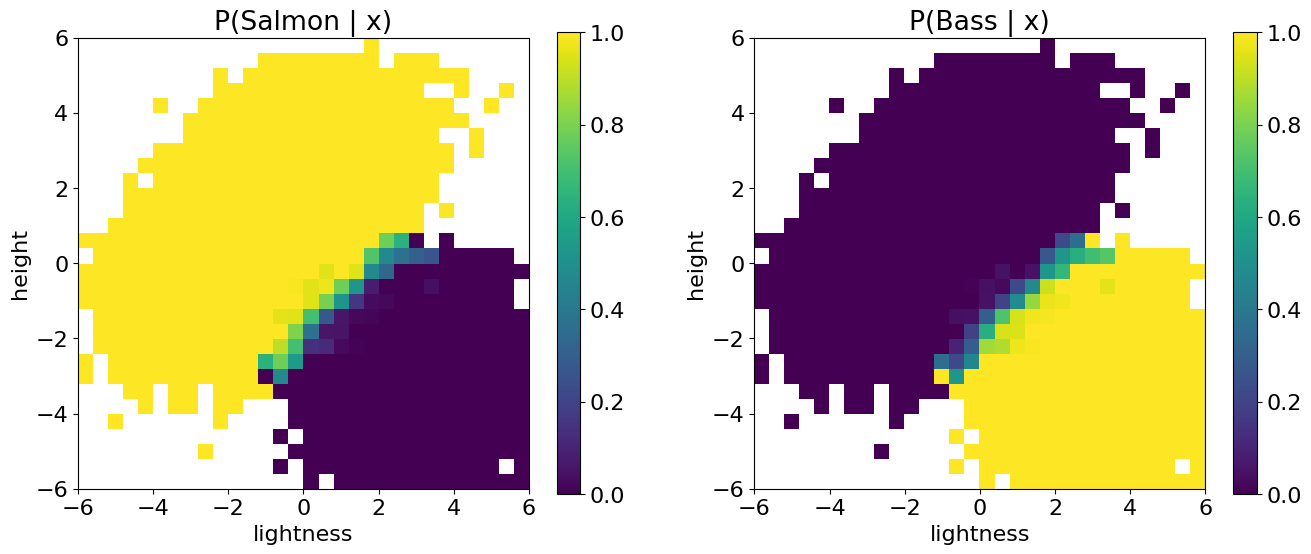

In [39]:
p_salmon_given_x = p_x_given_salmon / (p_x_given_salmon + p_x_given_bass)
p_bass_given_x = p_x_given_bass / (p_x_given_salmon + p_x_given_bass)

# Plot posterior probabilities
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, title='P(Salmon | x)')
s = plt.imshow(p_salmon_given_x, interpolation='nearest', origin='lower',
               extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')

ax = fig.add_subplot(122, title='P(Bass | x)')
s = plt.imshow(p_bass_given_x, interpolation='nearest', origin='lower',
               extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')

plt.show()


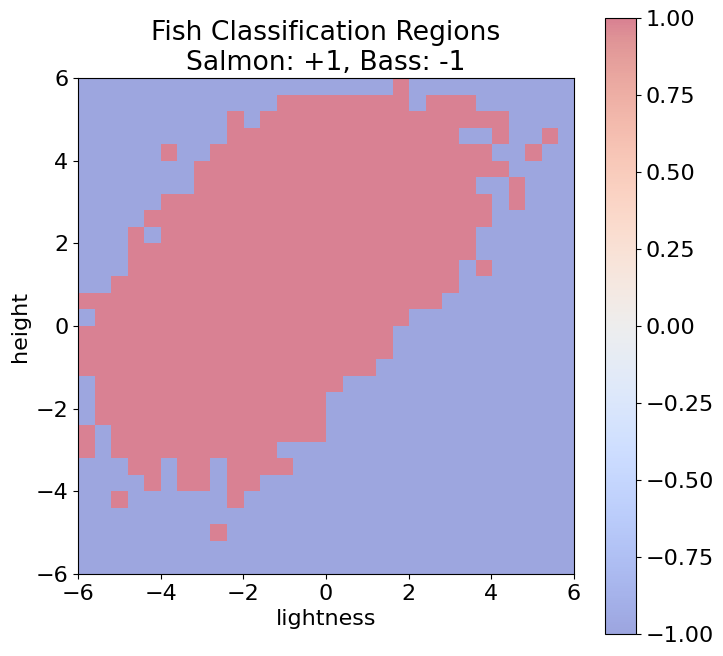

In [40]:
fish_classification = np.where(p_salmon_given_x > p_bass_given_x, 1, -1)

# Plot decision regions
fig = plt.figure(figsize=(8, 8))
s = plt.imshow(fish_classification, interpolation='nearest', origin='lower',
               extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]], cmap='coolwarm', alpha=0.5)
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')
plt.title('Fish Classification Regions\nSalmon: +1, Bass: -1')
plt.show()


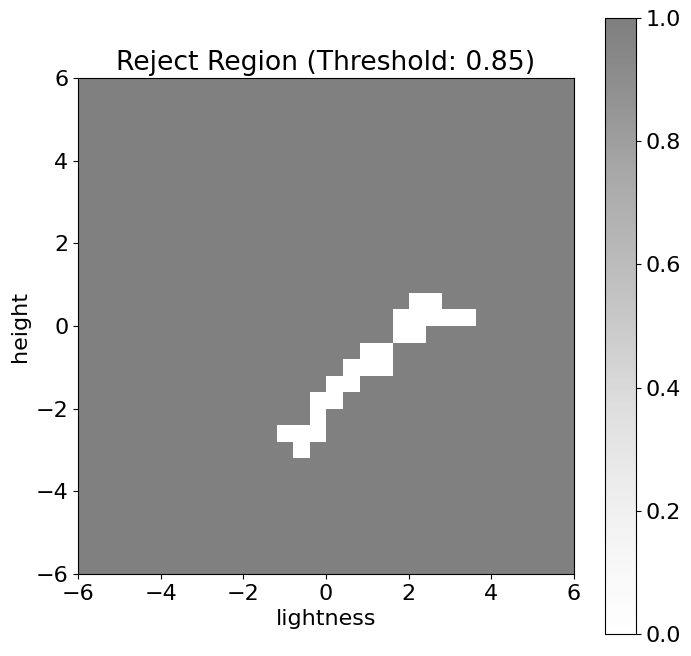

In [41]:
reject_region = np.where(np.maximum(p_salmon_given_x, p_bass_given_x) < 0.85, 0, 1)

# Plot reject region
fig = plt.figure(figsize=(8, 8))
s = plt.imshow(reject_region, interpolation='nearest', origin='lower',
               extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]], cmap='Greys', alpha=0.5)
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')
plt.title('Reject Region (Threshold: 0.85)')
plt.show()


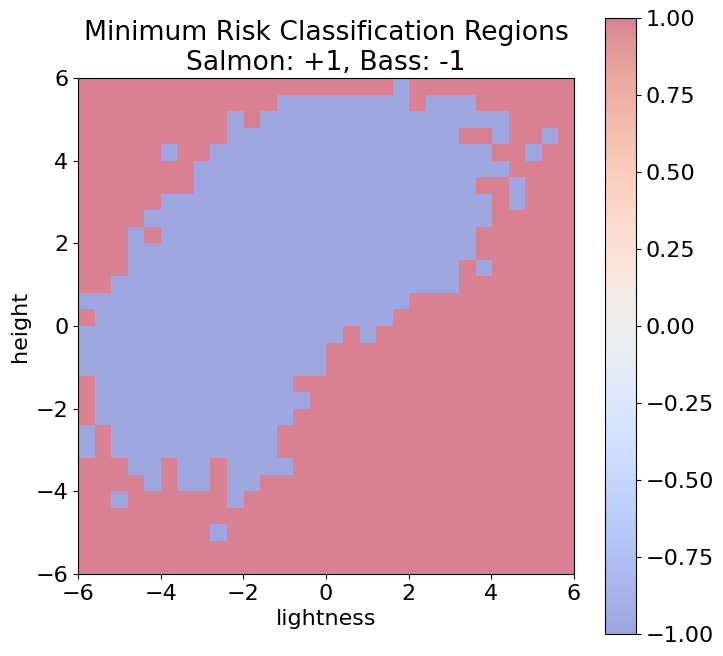

In [42]:
# Assuming p_bass_given_salmon and p_salmon_given_bass are the conditional probabilities
# for Bass given Salmon and Salmon given Bass respectively.

risk_table = np.array([[0, 30], [1, 0]])

cost_bass_given_salmon = risk_table[0, 1] * p_bass_given_salmon
cost_salmon_given_bass = risk_table[1, 0] * p_salmon_given_bass

min_risk_classification = np.where(cost_bass_given_salmon < cost_salmon_given_bass, -1, 1)

# Plot minimum risk classification regions
fig = plt.figure(figsize=(8, 8))
s = plt.imshow(min_risk_classification, interpolation='nearest', origin='lower',
               extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]], cmap='coolwarm', alpha=0.5)
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')
plt.title('Minimum Risk Classification Regions\nSalmon: +1, Bass: -1')
plt.show()
